### K-Means Clustering latitude and longitude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [2]:
df = pd.read_csv('properties_2016.csv')

C:\Users\carlo\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN


## Create an Elbow Curve to Get the Optimal Number of Clusters


#### Drop rows where the Longitude and/or Latitude have null values

In [4]:
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

In [6]:
# Variable with the Longitude and Latitude
X=df.loc[:,['parcelid','latitude','longitude']]
X.head(3)

,parcelid,latitude,longitude
0,10754147,34144442.0,-118654084.0
1,10759547,34140430.0,-118625364.0
2,10843547,33989359.0,-118394633.0


In [7]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['latitude']]
X_axis = df[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

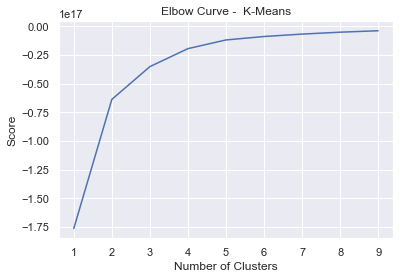

In [8]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve -  K-Means')

plt.show()

When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

## Create Clusters and Visualise

Text(0.5, 1.0, 'Clustering lat-lng coordinates')

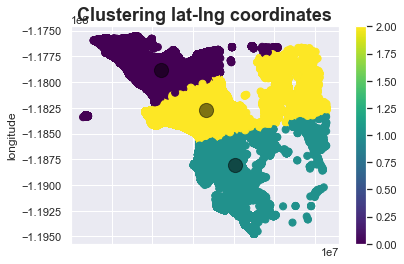

In [13]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

#Visualise Resutls
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering lat-lng coordinates',fontsize=18, fontweight='bold')


----------------------------------------------------------------------------------------------------------------------------

In [12]:
centers = kmeans.cluster_centers_
print(centers)

[[ 3.40819369e+07 -1.18275190e+08]
 [ 3.38057909e+07 -1.17884958e+08]
 [ 3.42580658e+07 -1.18810614e+08]]


In [15]:
### kmeans with 8 centroids

Text(0.5, 1.0, 'Clustering lat-lng coordinates')

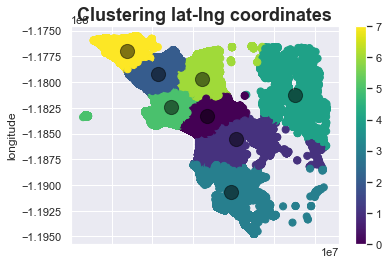

In [16]:
kmeans = KMeans(n_clusters = 8, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

#Visualise Resutls
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering lat-lng coordinates',fontsize=18, fontweight='bold')
